In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from cycler import cycler

%matplotlib inline

In [192]:
# graph styles
plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'patch.linewidth': 0.5,
    'figure.facecolor': '#c2d9e7',
    'font.size': 12.0,
    'axes.facecolor': '#c2d9e7',
    'axes.edgecolor': 'white',
    'axes.linewidth': '1',
    'axes.grid': True,
    'grid.color': 'white',
    'axes.titlesize': 'x-large',
    'axes.labelsize': 'large',
    'axes.axisbelow': True,
    'axes.prop_cycle': cycler('color', ['#275876', '#64aad4', '#ec866c', '#87d8d6', '#7273a5', '#f9d669']),
    'xtick.major.size': 0,
    'xtick.minor.size': 0,
    'ytick.major.size': 0,
    'ytick.minor.size': 0,
    'axes.labelweight': 'medium',
    'axes.spines.left': False,
    'axes.spines.bottom': False,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'legend.facecolor': '#FFFFFF',
    'font.family': 'Gulim',
})


# # matplotlib counts from the bottom and builds up
# for i, bar in enumerate(ax.patches):
#     value = int(round(bar.get_width()))
#     x_pos = bar.get_width() - 1
#     y_pos = i
# #     ax.text(x_pos, y_pos, value, verticalalignment='center')
#     ax.text(x_pos, y_pos, value, va='center', ha='right', color='white', fontweight='bold')

# ax.set_xlabel("Average life expectancy")
# ax.set_ylabel("")
# ax.set_title("Europeans really know how to live [forever]", pad=20)
# ax.title.set_fontsize(14)

In [4]:
bias_motivation = pd.read_excel("Table_1_Incidents_Offenses_Victims_and_Known_Offenders_by_Bias_Motivation_2016.xls")
offense_type = pd.read_excel("Table_2_Incidents_Offenses_Victims_and_Known_Offenders_by_Offense_Type_2016.xls")
offender_race = pd.read_excel("Table_3_Offenses_Known_Offenders_Race_and_Ethnicity_by_Offense_Type_2016.xls")

In [5]:
bias_motivation.head()

,Table 1,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,"Incidents, Offenses, Victims, and Known Offenders",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"by Bias Motivation, 2016",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Bias motivation,Incidents,Offenses,Victims1,Known\noffenders2,NaN,NaN,NaN
3,Total,6121,7321,7615,5770,NaN,NaN,NaN
4,Single-Bias Incidents,6063,7227,7509,5727,NaN,NaN,NaN


In [6]:
offense_type.head()

,Table 2,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,"Incidents, Offenses, Victims, and Known Offenders",NaN,NaN,NaN,NaN,NaN,NaN
1,"by Offense Type, 2016",NaN,NaN,NaN,NaN,NaN,NaN
2,Offense type,Incidents1,Offenses,Victims2,Known\noffenders3,NaN,NaN
3,Total,6121,7321,7615,5770,NaN,NaN
4,Crimes against persons:,3765,4720,4720,4353,NaN,NaN


In [7]:
offender_race.drop([0,1,2,3, 23,24,25,26], inplace=True)

In [8]:
offender_race.columns = offender_race.iloc[0]
offender_race.drop([4,5], inplace=True)

In [9]:
offender_race.columns.values[0] = 'crime_type'
offender_race.columns.values[1] = 'totals'
offender_race.drop(columns='totals', inplace=True)

In [10]:
offender_race.rename(index=str, columns={"White": "white", 2: "black", "American Indian or Alaska Native": "native_amer", "Asian": "asian", "Native Hawaiian or Other Pacific Islander": "native_hawaiian", "Group of multiple races": "multi_race", "Unknown race": "unknown", "Group of multiple ethnicities": "mult_ethnic"}, inplace=True)
offender_race

4,crime_type,white,Black or African American,American Indian or Alaska Native,asian,Native Hawaiian or Other Pacific Islander,Group of multiple races,Unknown race,Hispanic or Latino,Not Hispanic or Latino,Group of multiple ethnicities,Unknown ethnicity,nan
6,Crimes against persons:,2197,1117,35,35,4,199,505,214,856,28,1880,628
7,Murder and nonnegligent manslaughter,4,5,0,0,0,0,0,0,1,0,3,0
8,Rape (revised definition)2,9,6,2,0,0,0,3,2,2,1,14,4
9,Rape (legacy definition)3,0,0,0,0,0,0,0,0,0,0,0,0
10,Aggravated assault,395,268,9,7,1,63,56,69,179,9,313,74
11,Simple assault,764,513,17,9,3,93,184,90,377,14,654,104
12,Intimidation,1015,322,7,19,0,43,262,52,288,4,893,441
13,Other4,10,3,0,0,0,0,0,1,9,0,3,5
14,Crimes against property:,429,194,12,9,3,45,504,40,153,8,564,1323
15,Robbery,25,67,3,0,0,13,11,10,30,1,47,15


In [11]:
offender_race = offender_race.infer_objects()
offender_race

4,crime_type,white,Black or African American,American Indian or Alaska Native,asian,Native Hawaiian or Other Pacific Islander,Group of multiple races,Unknown race,Hispanic or Latino,Not Hispanic or Latino,Group of multiple ethnicities,Unknown ethnicity,nan
6,Crimes against persons:,2197,1117,35,35,4,199,505,214,856,28,1880,628
7,Murder and nonnegligent manslaughter,4,5,0,0,0,0,0,0,1,0,3,0
8,Rape (revised definition)2,9,6,2,0,0,0,3,2,2,1,14,4
9,Rape (legacy definition)3,0,0,0,0,0,0,0,0,0,0,0,0
10,Aggravated assault,395,268,9,7,1,63,56,69,179,9,313,74
11,Simple assault,764,513,17,9,3,93,184,90,377,14,654,104
12,Intimidation,1015,322,7,19,0,43,262,52,288,4,893,441
13,Other4,10,3,0,0,0,0,0,1,9,0,3,5
14,Crimes against property:,429,194,12,9,3,45,504,40,153,8,564,1323
15,Robbery,25,67,3,0,0,13,11,10,30,1,47,15


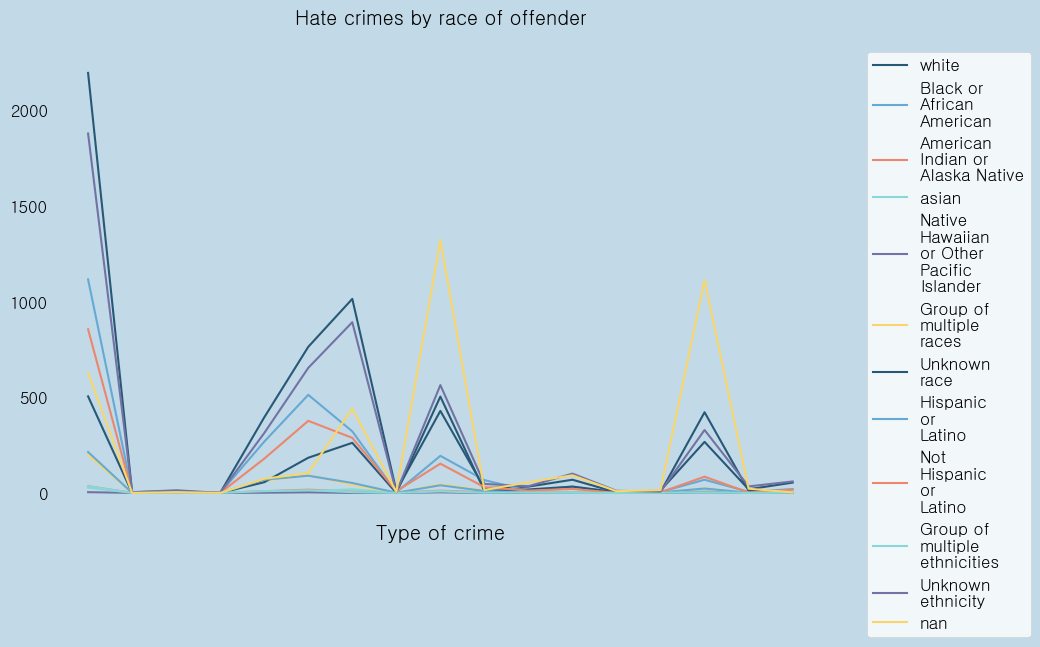

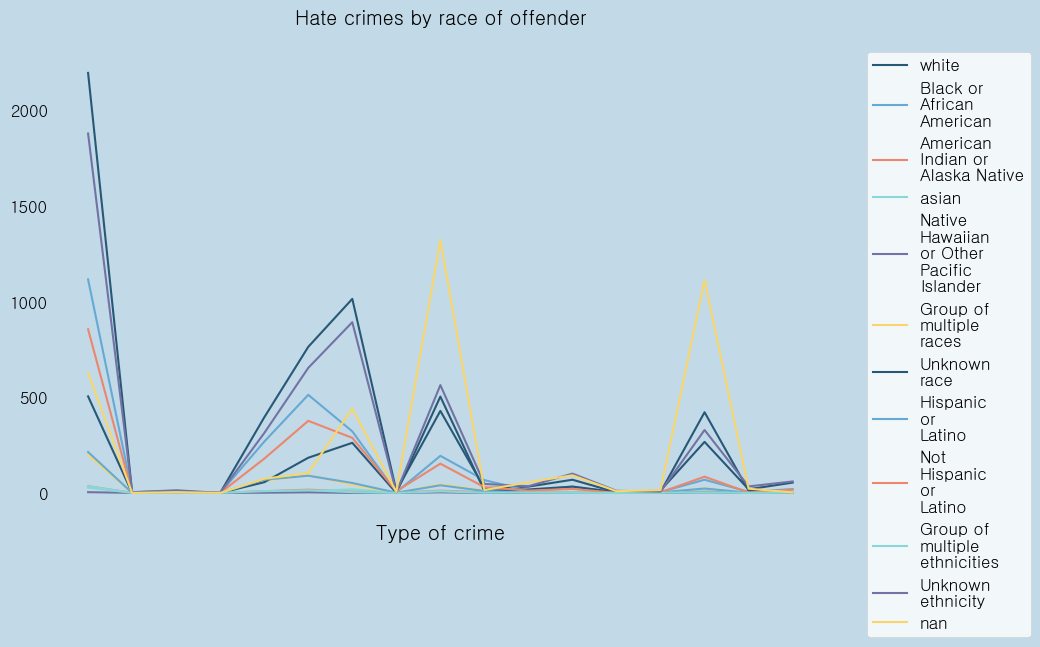

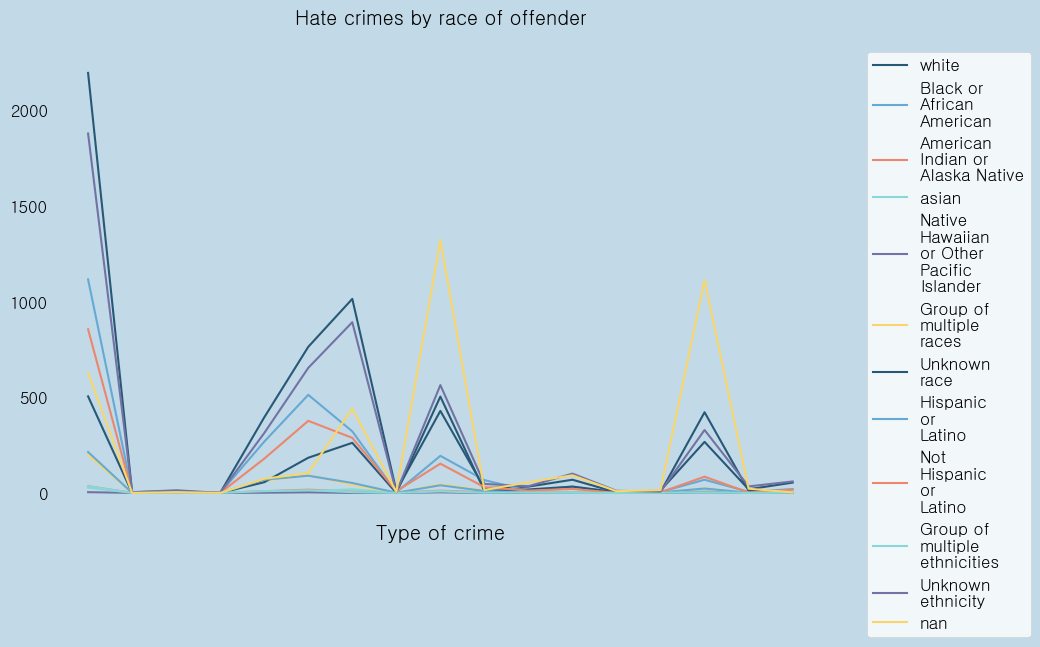

In [35]:
ax = offender_race.plot(x='crime_type', figsize=(10,6))
ax.set_xlabel("Type of crime")
ax.set_ylabel("")
ax.set_title("Hate crimes by race of offender", pad=20)
ax.title.set_fontsize(14)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [72]:
races = pd.read_excel("Table_5_Offenses_Known_Offenders_Race_and_Ethnicity_by_Bias_Motivation_2016.xls")

In [41]:
#races

In [73]:
races.drop([0,1,2,3, 5, 48, 49], inplace=True)

In [74]:
races.columns = races.iloc[0]
races.drop([4], inplace=True)

In [75]:
races

4,nan,nan,White,Black or African American,American Indian or Alaska Native,Asian,Native Hawaiian or Other Pacific Islander,Group of multiple races,Unknown race,Hispanic or Latino,Not Hispanic or Latino,Group of multiple ethnicities,Unknown ethnicity,nan,nan,nan,
6,Single-Bias Incidents,7227,2661,1307,49,45,7,242,993,252,998,38,2476,1923,NaN,NaN,NaN
7,Race/Ethnicity/Ancestry:,4229,1775,781,37,32,2,150,398,135,662,22,1618,1054,NaN,NaN,NaN
8,Anti-White,876,133,452,20,6,0,27,80,22,169,9,393,158,NaN,NaN,NaN
9,Anti-Black or African American,2122,1142,80,9,17,1,88,202,82,267,5,808,583,NaN,NaN,NaN
10,Anti-American Indian or Alaska Native,161,56,28,2,0,0,3,14,1,3,0,92,58,NaN,NaN,NaN
11,Anti-Asian,131,65,20,2,6,0,5,9,6,28,3,40,24,NaN,NaN,NaN
12,Anti-Native Hawaiian or Other Pacific Islander,9,4,4,0,0,0,0,0,0,1,0,3,1,NaN,NaN,NaN
13,"Anti-Multiple Races, Group",178,54,33,0,1,0,9,17,2,31,1,50,64,NaN,NaN,NaN
14,Anti-Arab,56,32,6,0,1,0,3,6,4,16,0,14,8,NaN,NaN,NaN
15,Anti-Hispanic or Latino,449,228,114,2,0,1,12,24,15,112,2,150,68,NaN,NaN,NaN


In [16]:
races.columns.values[0] = 'crime_type'
races.columns.values[1] = 'total'

In [18]:
#races

In [43]:
#races.drop(columns=['total', 14, 15, 16])
#races.drop([6], inplace=True)

In [45]:
races

4,total,White,Black or African American,American Indian or Alaska Native,Asian,Native Hawaiian or Other Pacific Islander,Group of multiple races,Unknown race,Hispanic or Latino,Not Hispanic or Latino,Group of multiple ethnicities,Unknown ethnicity,nan,nan,nan,
crime_type,,,,,,,,,,,,,,,,
Race/Ethnicity/Ancestry:,4229,1775,781,37,32,2,150,398,135,662,22,1618,1054,NaN,NaN,NaN
Anti-White,876,133,452,20,6,0,27,80,22,169,9,393,158,NaN,NaN,NaN
Anti-Black or African American,2122,1142,80,9,17,1,88,202,82,267,5,808,583,NaN,NaN,NaN
Anti-American Indian or Alaska Native,161,56,28,2,0,0,3,14,1,3,0,92,58,NaN,NaN,NaN
Anti-Asian,131,65,20,2,6,0,5,9,6,28,3,40,24,NaN,NaN,NaN
Anti-Native Hawaiian or Other Pacific Islander,9,4,4,0,0,0,0,0,0,1,0,3,1,NaN,NaN,NaN
"Anti-Multiple Races, Group",178,54,33,0,1,0,9,17,2,31,1,50,64,NaN,NaN,NaN
Anti-Arab,56,32,6,0,1,0,3,6,4,16,0,14,8,NaN,NaN,NaN
Anti-Hispanic or Latino,449,228,114,2,0,1,12,24,15,112,2,150,68,NaN,NaN,NaN


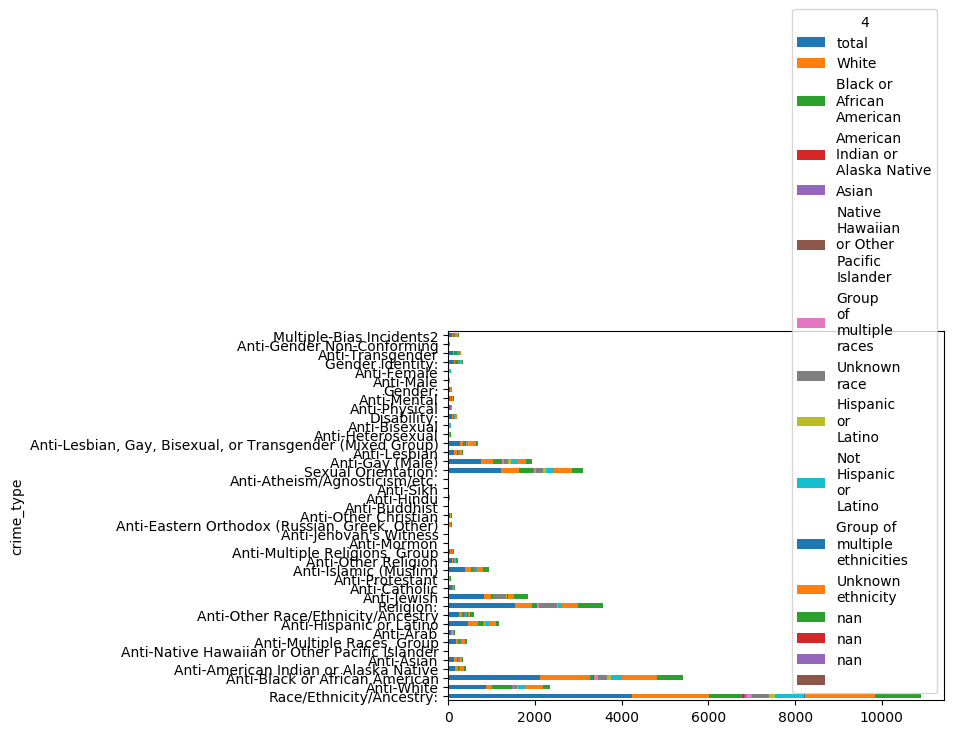

In [26]:
plt.rcdefaults()
races.plot(x='crime_type', kind='barh', stacked=True)
plt.show()

In [76]:
races_transposed = races.T
races_transposed.drop([14,15,16])

KeyError: '[14 15 16] not found in axis'

In [37]:
races_transposed.plot(x='crime_type', kind='barh', stacked=True)
plt.show()

KeyError: 'crime_type'

In [157]:
test_df = races.T

In [159]:
test_df.reset_index(inplace=True)

In [160]:
test_df.columns = test_df.iloc[0]

In [161]:
test_df.drop([0], inplace=True)

In [165]:
test_df.rename(columns={test_df.columns[0]: "offender_race" }, inplace=True)

In [217]:
test_df.drop([1, 8, 10, 12, 13, 14, 15, 16], inplace=True)

In [163]:
test_df.drop(columns='Single-Bias Incidents', inplace=True)

In [170]:
test_df.rename(columns={test_df.columns[1]: "race_crimes", test_df.columns[2]: "anti_white", test_df.columns[3]: "anti_black", test_df.columns[4]: "anti_native", test_df.columns[5]: "anti_asian", test_df.columns[6]: "anti_hawaiian", test_df.columns[7]: "anti_everyone", test_df.columns[8]: "anti_arab", test_df.columns[9]: "anti_hispanic", test_df.columns[10]: "anti_other",}, inplace=True)



In [196]:
# totals df contains the total number of race, religion, disability, etc crimes, sorted by race of offender
totals_df = test_df[['offender_race', 'race_crimes', 'Religion:', 'Disability:', 'Gender:', 'Gender Identity:']]
totals_df

,offender_race,race_crimes,Religion:,Disability:,Gender:,Gender Identity:
1,NaN,4229,1538,76,36,130
2,White,1775,389,35,18,30
3,Black or\nAfrican\nAmerican,781,118,16,9,57
4,American\nIndian or\nAlaska Native,37,5,1,0,0
5,Asian,32,5,1,0,1
6,Native\nHawaiian\nor Other\nPacific\nIslander,2,2,0,0,0
7,Group\nof\nmultiple\nraces,150,32,1,1,9
8,Unknown\nrace,398,410,6,4,19
9,Hispanic\nor\nLatino,135,23,2,0,12
10,Not\nHispanic\nor\nLatino,662,100,14,8,37


In [197]:
totals_df.drop([1, 8, 10, 12, 13, 14, 15, 16], inplace=True)

/Users/Veronica/.pyenv/versions/3.6.5/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


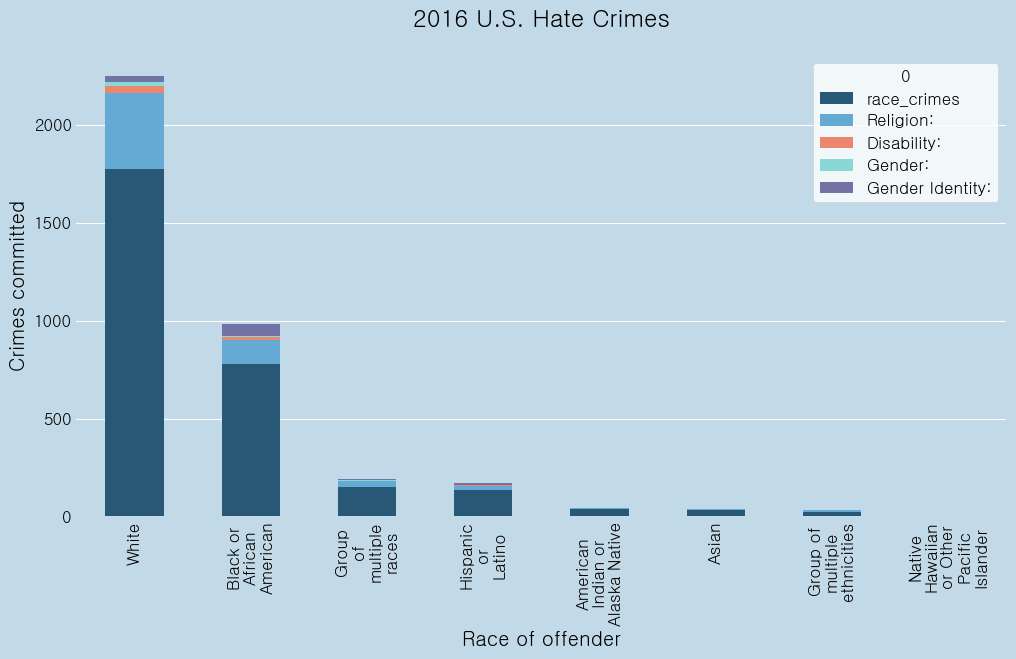

In [208]:
ax = totals_df.sort_values(by='race_crimes', ascending=False).plot(x='offender_race', kind='bar', stacked=True, figsize=(12,6))
ax.grid(False, axis='x')
ax.set_title("2016 U.S. Hate Crimes", pad=20)
ax.set_xlabel("Race of offender")
ax.set_ylabel("Crimes committed")
ax.spines.bottom=True

plt.show()

In [210]:
totals2_df = test_df[['offender_race',  'Disability:', 'Gender:', 'Gender Identity:']]
totals2_df.drop([1, 8, 10, 12, 13, 14, 15, 16], inplace=True)

/Users/Veronica/.pyenv/versions/3.6.5/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


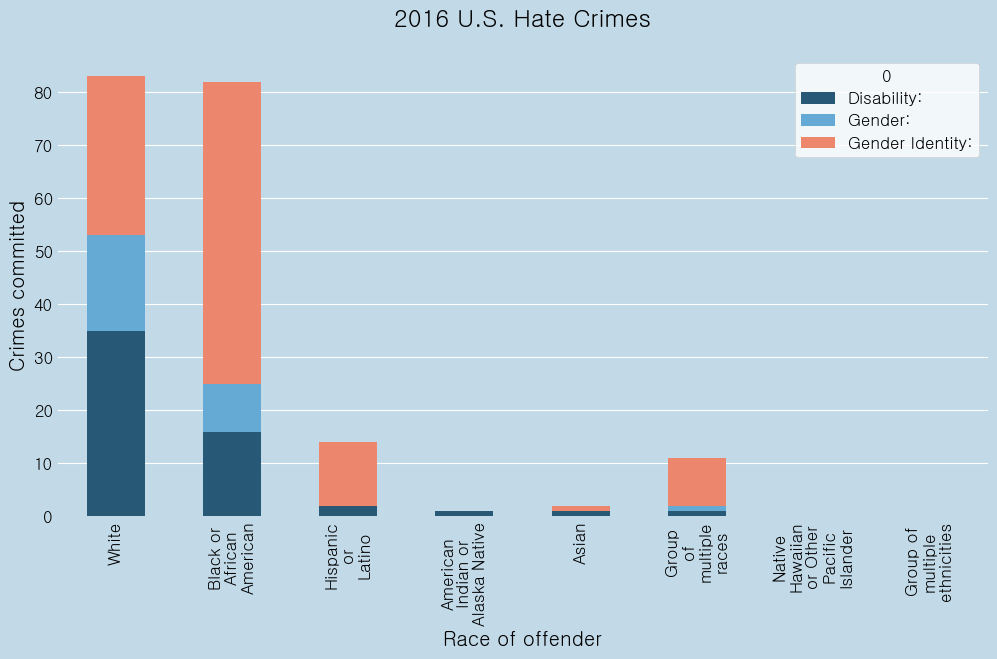

In [213]:
ax = totals2_df.sort_values(by='Disability:', ascending=False).plot(x='offender_race', kind='bar', stacked=True, figsize=(12,6))
ax.grid(False, axis='x')
ax.set_title("2016 U.S. Hate Crimes", pad=20)
ax.set_xlabel("Race of offender")
ax.set_ylabel("Crimes committed")
ax.spines.bottom=True

plt.show()

In [218]:
gender_identity = test_df[['offender_race', 'Anti-Transgender',  'Anti-Gender Non-Conforming', 'Anti-Female', 'Anti-Male']]
gender_identity

,offender_race,Anti-Transgender,Anti-Gender Non-Conforming,Anti-Female,Anti-Male
2,White,27,3,8,10
3,Black or\nAfrican\nAmerican,54,3,9,0
4,American\nIndian or\nAlaska Native,0,0,0,0
5,Asian,0,1,0,0
6,Native\nHawaiian\nor Other\nPacific\nIslander,0,0,0,0
7,Group\nof\nmultiple\nraces,9,0,1,0
9,Hispanic\nor\nLatino,12,0,0,0
11,Group of\nmultiple\nethnicities,0,0,0,0


In [220]:
gender_identity.drop([4, 6, 11], inplace=True)

/Users/Veronica/.pyenv/versions/3.6.5/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


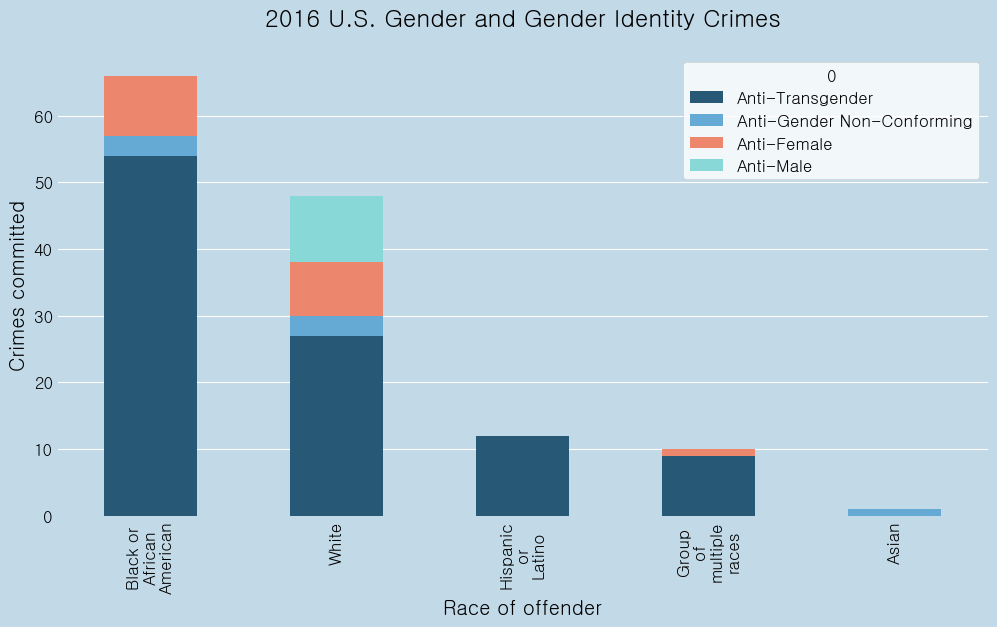

In [221]:
ax = gender_identity.sort_values(by='Anti-Transgender', ascending=False).plot(x='offender_race', kind='bar', stacked=True, figsize=(12,6))
ax.grid(False, axis='x')
ax.set_title("2016 U.S. Gender and Gender Identity Crimes", pad=20)
ax.set_xlabel("Race of offender")
ax.set_ylabel("Crimes committed")
ax.spines.bottom=True

plt.show()

In [171]:
test_df

,offender_race,race_crimes,anti_white,anti_black,anti_native,anti_asian,anti_hawaiian,anti_everyone,anti_arab,anti_hispanic,...,Disability:,Anti-Physical,Anti-Mental,Gender:,Anti-Male,Anti-Female,Gender Identity:,Anti-Transgender,Anti-Gender Non-Conforming,Multiple-Bias Incidents2
1,NaN,4229,876,2122,161,131,9,178,56,449,...,76,29,47,36,10,26,130,111,19,94
2,White,1775,133,1142,56,65,4,54,32,228,...,35,14,21,18,10,8,30,27,3,19
3,Black or\nAfrican\nAmerican,781,452,80,28,20,4,33,6,114,...,16,8,8,9,0,9,57,54,3,24
4,American\nIndian or\nAlaska Native,37,20,9,2,2,0,0,0,2,...,1,0,1,0,0,0,0,0,0,0
5,Asian,32,6,17,0,6,0,1,1,0,...,1,1,0,0,0,0,1,0,1,0
6,Native\nHawaiian\nor Other\nPacific\nIslander,2,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,Group\nof\nmultiple\nraces,150,27,88,3,5,0,9,3,12,...,1,1,0,1,0,1,9,9,0,3
8,Unknown\nrace,398,80,202,14,9,0,17,6,24,...,6,2,4,4,0,4,19,14,5,17
9,Hispanic\nor\nLatino,135,22,82,1,6,0,2,4,15,...,2,0,2,0,0,0,12,12,0,2
10,Not\nHispanic\nor\nLatino,662,169,267,3,28,1,31,16,112,...,14,7,7,8,2,6,37,33,4,28


In [137]:
#test_df.offender_race
list(test_df.columns.values)

['offender_race',
 'Single-Bias Incidents',
 'Race/Ethnicity/Ancestry:',
 'Anti-White',
 'Anti-Black or African American',
 'Anti-American Indian or Alaska Native',
 'Anti-Asian',
 'Anti-Native Hawaiian or Other Pacific Islander',
 'Anti-Multiple Races, Group',
 'Anti-Arab',
 'Anti-Hispanic or Latino',
 'Anti-Other Race/Ethnicity/Ancestry',
 'Religion:',
 'Anti-Jewish',
 'Anti-Catholic',
 'Anti-Protestant',
 'Anti-Islamic (Muslim)',
 'Anti-Other Religion',
 'Anti-Multiple Religions, Group',
 'Anti-Mormon',
 "Anti-Jehovah's Witness",
 'Anti-Eastern Orthodox (Russian, Greek, Other)',
 'Anti-Other Christian',
 'Anti-Buddhist',
 'Anti-Hindu',
 'Anti-Sikh',
 'Anti-Atheism/Agnosticism/etc.',
 'Sexual Orientation:',
 'Anti-Gay (Male)',
 'Anti-Lesbian',
 'Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)',
 'Anti-Heterosexual',
 'Anti-Bisexual',
 'Disability:',
 'Anti-Physical',
 'Anti-Mental',
 'Gender:',
 'Anti-Male',
 'Anti-Female',
 'Gender Identity:',
 'Anti-Transgender',
 'Anti-G

In [145]:
test_df.drop([1, 13, 14, 15, 16], inplace=True)

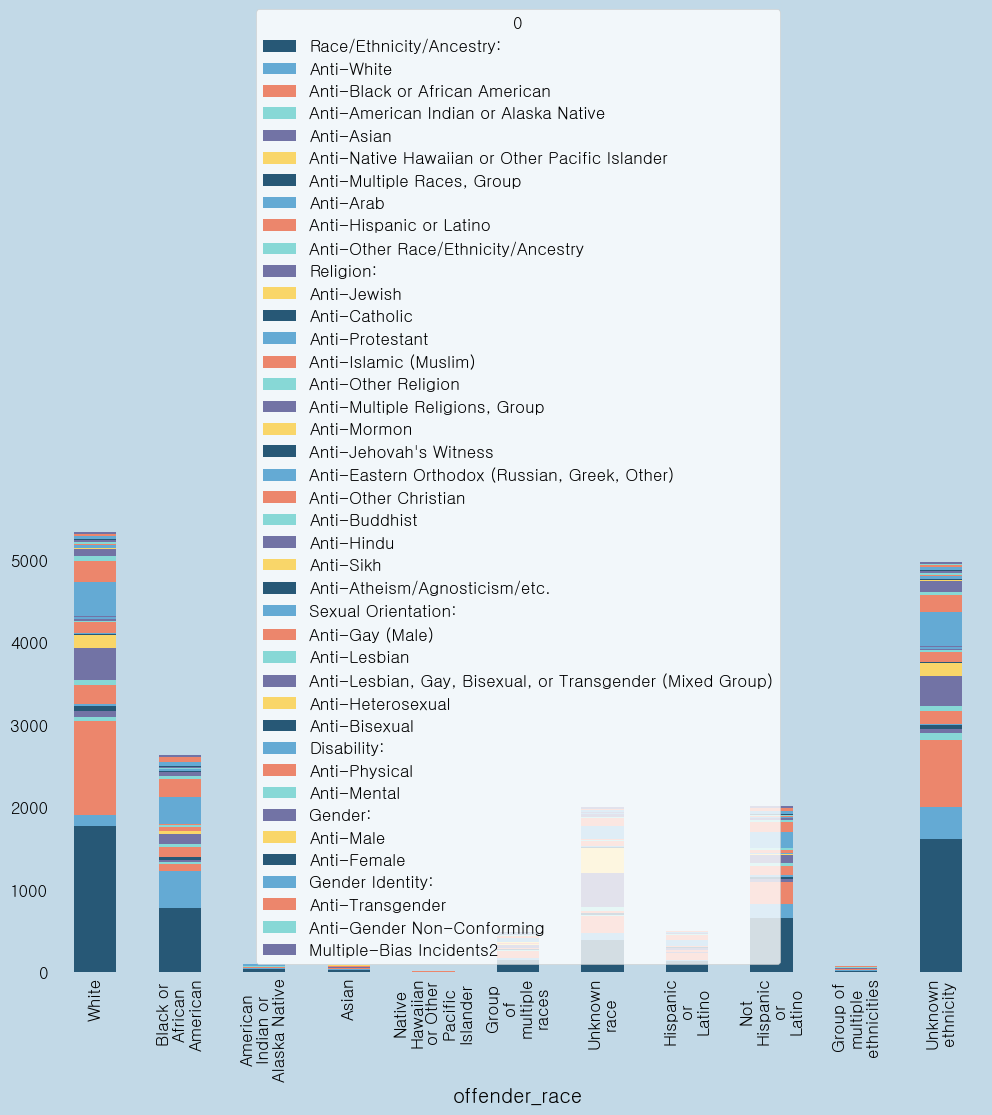

In [154]:
ax = test_df.plot(x='offender_race', kind='bar', stacked=True, figsize=(12,6))
#ax.legend_=None

plt.show()

In [ ]:
#look at race vs religion
#look at some major cities, maybe northern US vs southern? 